In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import nmma
import json
import os
import bilby
from astropy.time import Time

In [2]:
from nmma.em.model import SimpleKilonovaLightCurveModel,GRBLightCurveModel, SVDLightCurveModel, KilonovaGRBLightCurveModel, GenericCombineLightCurveModel, SupernovaLightCurveModel, ShockCoolingLightCurveModel

from nmma.em.injection import create_light_curve_data as cld

Install afterglowpy if you want to timeout simulations.


In [3]:
def luminosity(distance, mag):
    """
    Calculate the luminosity of a source given its distance and apparent magnitude.
    Parameters
    """
    return mag + 5 * np.log10(distance * 1e6 /10.0)

In [62]:
lcPath = './candidate_data/paper_candidates/v2/candidate_data/ZTF20abwysqyForced.dat'
df = pd.read_csv(lcPath, sep=' ', header=None, names=['t', 'filter', 'mag', 'mag_unc'])

trigger_time = 59087.18740740741
df['t'] = Time(pd.to_datetime(df['t'])).mjd
df['t'] = df['t'] - trigger_time

display(df)

,t,filter,mag,mag_unc
0,6.132072,i,20.193004,inf
1,6.181840,r,20.265292,inf
2,6.268993,g,20.107244,inf
3,7.218819,r,19.833552,inf
4,7.283854,g,19.838025,inf
5,8.166944,g,19.909915,inf
6,8.260023,r,20.097329,inf
7,-6.742778,g,21.236449,inf
8,-5.762164,r,21.351784,inf
9,-5.720660,g,21.167371,inf


In [63]:
snPath = './outdir/abwysqyForced_nugent-hyper/abwysqyForced_nugent-hyper_result.json'
grbPath = './outdir/abwysqyForced_TrPi2018/abwysqyForced_TrPi2018_result.json'
knPath = './outdir/abwysqyForced_Bu2019lm/abwysqyForced_Bu2019lm_result.json'
with open(snPath,"r") as f:
    snResults = json.load(f, object_hook=bilby.core.utils.decode_bilby_json)
with open (grbPath,"r") as f:
    grbResults = json.load(f, object_hook=bilby.core.utils.decode_bilby_json)
with open (knPath,"r") as f:
    knResults = json.load(f, object_hook=bilby.core.utils.decode_bilby_json)

In [64]:
display(grbResults['posterior'])
display(snResults['posterior'])

,luminosity_distance,inclination_EM,log10_E0,thetaCore,thetaWing,log10_n0,p,log10_epsilon_e,log10_epsilon_B,Ebv,KNtimeshift,ksiN,L0,dL,b,q,ts,log_likelihood,log_prior
0,760.890835,0.655995,51.730769,0.311806,0.578721,-0.782234,2.913166,-0.152170,-1.858222,0.410458,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-9.647628,-15.050239
1,452.559116,0.623241,52.508718,0.327808,0.734971,-2.467347,2.377148,-1.627941,-1.975409,0.427928,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-8.899586,-15.208432
2,2543.450563,0.868613,52.741117,0.365214,1.095788,-0.374173,2.804276,-0.070324,-2.670773,0.351564,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-7.624298,-14.515607
3,4998.930076,0.746411,52.286948,0.341336,1.301897,-2.508060,2.289664,-0.654658,-1.096161,0.002701,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-7.187254,-13.685111
4,2291.400043,0.489612,51.021412,0.462575,1.065735,-0.647358,2.386646,-0.253448,-0.977212,0.254554,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-7.101028,-14.635949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,1965.116307,0.381917,51.513709,0.299556,1.140804,-1.272135,2.644654,-0.596440,-1.468649,0.371403,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-4.096546,-15.326787
374,4294.374224,0.292769,51.971602,0.297630,0.488789,-0.702897,2.261428,-0.623656,-1.793515,0.256699,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-4.048587,-15.130998
375,3749.242207,0.392440,52.497250,0.182474,0.863106,-1.551302,2.574560,-0.638874,-1.537252,0.145955,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-3.990170,-14.548786
376,4061.615067,0.276128,52.273153,0.288549,0.826688,-3.005089,2.783521,-0.357209,-2.223391,0.100694,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-3.916825,-14.786370


,luminosity_distance,inclination_EM,supernova_mag_boost,Ebv,KNtimeshift,log_likelihood,log_prior
0,616.002254,0.762780,0.511859,0.475030,0.0,-31.114755,-12.739363
1,373.597295,0.492356,-0.090554,0.387833,0.0,-29.637353,-12.479449
2,2008.952051,0.409785,-3.885756,0.332669,0.0,-29.487377,-12.388921
3,1666.589790,0.690801,-3.716725,0.510697,0.0,-29.209650,-13.276577
4,1118.940203,0.550216,-0.211497,0.213183,0.0,-29.206197,-11.712666
...,...,...,...,...,...,...,...
528,314.636440,0.547612,1.738006,0.220952,0.0,-23.636908,-11.738787
529,448.486514,0.704775,1.495368,0.107701,0.0,-23.669146,-11.240859
530,355.205682,0.611234,1.694362,0.104017,0.0,-23.459699,-11.354222
531,543.365400,0.554839,1.147343,0.014083,0.0,-23.508906,-11.264167


In [65]:

sample_times = np.arange(.01, 14, 0.1)
snModel = SupernovaLightCurveModel(sample_times=sample_times, model='nugent-hyper')
grbModel = GRBLightCurveModel(sample_times=sample_times, model='TrPi2018')
#knModel = SimpleKilonovaLightCurveModel(sample_times=sample_times, model='Bu2019lm')

In [66]:
grb_df = pd.DataFrame(grbResults['posterior'])
grb_df_sorted = grb_df.sort_values(by=['log_likelihood'], ascending=False, ignore_index=True)
grb_bf = grb_df_sorted.iloc[0].to_dict()
display(grb_bf)
grb_tp = int(grb_df_sorted.shape[0] *1e-1) #top 10% index
print(grb_tp)
grb_var = grb_df_sorted['luminosity_distance'][0:grb_tp].std()
print(grb_var)

print()
sn_df = pd.DataFrame(snResults['posterior'])
sn_df_sorted = sn_df.sort_values(by=['log_likelihood'], ascending=False, ignore_index=True)
sn_bf = sn_df_sorted.iloc[0].to_dict()
display(sn_bf)
sn_tp = int(sn_df_sorted.shape[0] *1e-1)
print(sn_tp)
sn_var = sn_df_sorted['luminosity_distance'][0:sn_tp].std()
print(sn_var)

print()
kn_df = pd.DataFrame(knResults['posterior'])
kn_df_sorted = kn_df.sort_values(by=['log_likelihood'], ascending=False, ignore_index=True)
kn_bf = kn_df_sorted.iloc[0].to_dict()
display(kn_bf)
kn_tp = int(kn_df_sorted.shape[0] *1e-1)
display(kn_tp)
kn_var = kn_df_sorted['luminosity_distance'][0:kn_tp].std()
print(kn_var)


# grb_llq = grb_df.quantile([0.50], axis=0 )['log_likelihood']
# #display(grb_llq)
# ## locate where these quantiles occur and return the 3 rows as a dataframe
# grb_lc_params = grb_df[grb_df['log_likelihood'].isin(grb_llq)].to_dict('list')
# grb_lc_params = [dict(zip(grb_lc_params, t)) for t in zip(*grb_lc_params.values())]
# display(grb_lc_params)

# sn_df = pd.DataFrame(snResults['posterior'])
# sn_llq = sn_df.quantile([0.5,0.99], axis=0 )['log_likelihood']
# #display(sn_llq)
# sn_lc_params = sn_df[sn_df['log_likelihood'].isin(sn_llq)][1:3].to_dict('list')
# sn_lc_params = [dict(zip(sn_lc_params, t)) for t in zip(*sn_lc_params.values())]
# display(sn_lc_params)
# #display(sn_df['log_likelihood'].isin(sn_llq)[sn_df['log_likelihood'].isin(sn_llq)].index)
# #display(grb_df['log_likelihood'].isin(grb_llq)[grb_df['log_likelihood'].isin(grb_llq)].index)


{'luminosity_distance': 6107.680232259461,
 'inclination_EM': 0.4121889774609426,
 'log10_E0': 51.493170167061805,
 'thetaCore': 0.2825151063823694,
 'thetaWing': 1.3331687813736817,
 'log10_n0': -2.4853228212943907,
 'p': 2.699204140879088,
 'log10_epsilon_e': -0.48035726712188165,
 'log10_epsilon_B': -0.4547690550944097,
 'Ebv': 0.039994434999567216,
 'KNtimeshift': 0.0,
 'ksiN': 1.0,
 'L0': 0.0,
 'dL': 3.09e+19,
 'b': 6.0,
 'q': 0.0,
 'ts': 0.0,
 'log_likelihood': -3.880255825864674,
 'log_prior': -14.28044277377127}

37
1702.9384513546534



{'luminosity_distance': 207.3462779727329,
 'inclination_EM': 0.30038238410302687,
 'supernova_mag_boost': 3.290406201308125,
 'Ebv': 0.04033441497056813,
 'KNtimeshift': 0.0,
 'log_likelihood': -23.047599097630624,
 'log_prior': -11.889187331351204}

53
102.51518370399762



{'luminosity_distance': 104.53586482079278,
 'KNphi': 71.57308597747505,
 'inclination_EM': 0.35860477669152385,
 'log10_mej_dyn': -2.99343944513279,
 'log10_mej_wind': -0.794702885034817,
 'Ebv': 0.5540176284409394,
 'KNtimeshift': 0.0,
 'log_likelihood': -6.352313788458327,
 'log_prior': -14.929688446082189}

76

16.409067798877405


In [67]:
#quantiles = lambda x: 
# grb_lc_params = [
#     {key: np.quantile(value, q) for key, value in grbResults['posterior'].items()}
#     for q in [0.16, 0.5, 0.84]
# ]
#display(grb_lc_params)
# sn_lc_params = [
#     {key: np.quantile(value, q) for key, value in snResults['posterior'].items()}
#     for q in [0.16, 0.5, 0.84]
# ]
# sn16, sn50, sn84 = (snModel.generate_lightcurve(sample_times=sample_times,parameters=sn_lc_params[0]), 
#                     snModel.generate_lightcurve(sample_times=sample_times,parameters=sn_lc_params[1]), 
#                     snModel.generate_lightcurve(sample_times=sample_times,parameters=sn_lc_params[2]))

# grb16, grb50, grb84 = (grbModel.generate_lightcurve(sample_times=sample_times,parameters=grb_lc_params[0]),
#                        grbModel.generate_lightcurve(sample_times=sample_times,parameters=grb_lc_params[1]),
#                        grbModel.generate_lightcurve(sample_times=sample_times,parameters=grb_lc_params[2]))


## injection.py shows how to do the absolute (this is currently absolute mag) 

In [68]:

# grb50 = grbModel.generate_lightcurve(sample_times=sample_times,parameters=grb_lc_params[0])
# grb99 = grbModel.generate_lightcurve(sample_times=sample_times,parameters=grb_lc_params[1])
# sn50 = snModel.generate_lightcurve(sample_times=sample_times,parameters=sn_lc_params[0])
# sn99 = snModel.generate_lightcurve(sample_times=sample_times,parameters=sn_lc_params[1])
grb_blc = grbModel.generate_lightcurve(sample_times=sample_times,parameters=grb_bf)
sn_blc = snModel.generate_lightcurve(sample_times=sample_times,parameters=sn_bf)
#kn_blc = knModel.generate_lightcurve(sample_times=sample_times,parameters=kn_bf)

In [69]:
cp = sns.color_palette("colorblind")
cp

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

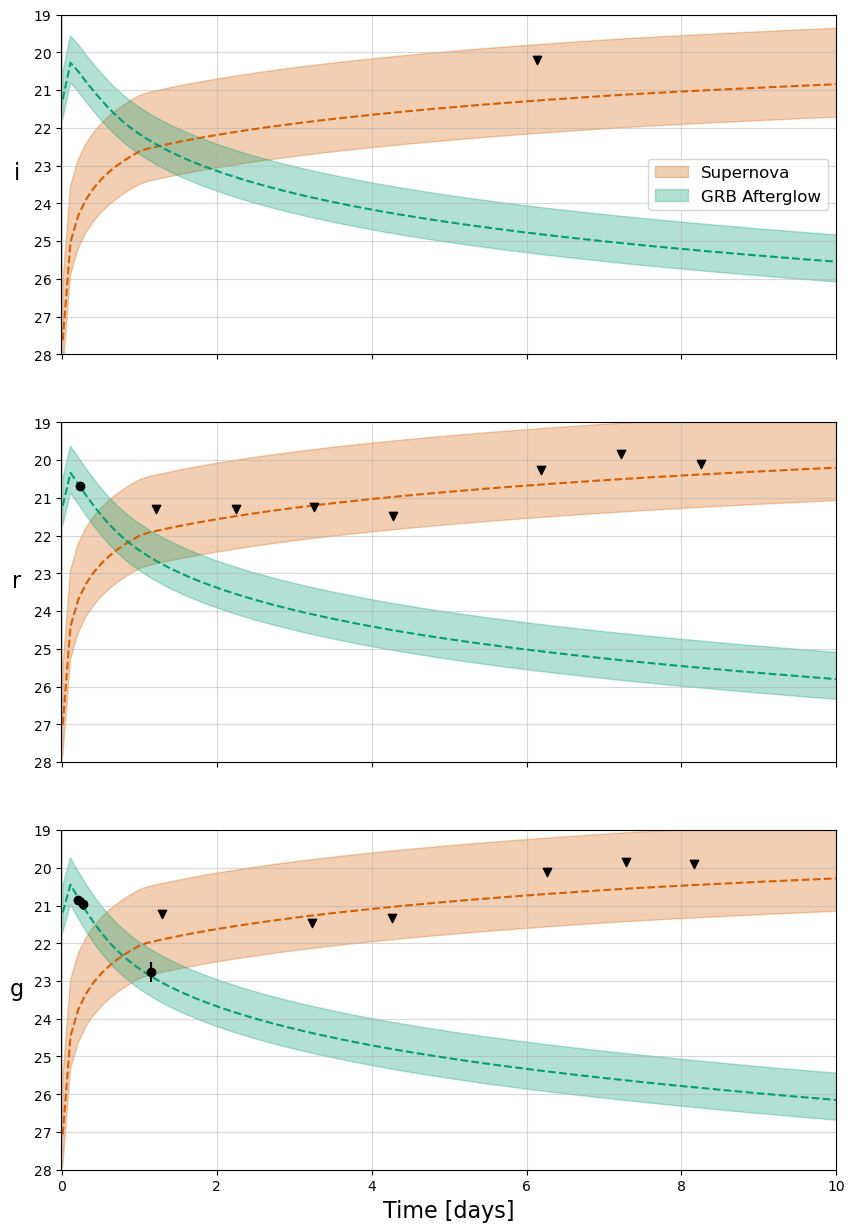

In [70]:

fig, axs = plt.subplots(3,1,figsize=(10, 15),sharex=True, sharey=True, facecolor='w')
filters = ['i', 'r', 'g']

for i, filter in enumerate(filters):
    grb_dist = grb_bf["luminosity_distance"]
    
    ax = axs[i]
    ax.set_ylabel(f'{filter}',rotation=0, labelpad=12, fontsize=16)
    
    ##supernova model
    sn_dist = sn_bf["luminosity_distance"]
    sn_lcc = luminosity(sn_dist, sn_blc[1][filter])
    sn_lcc_lower = luminosity(sn_dist+sn_var, sn_blc[1][filter])
    sn_lcc_upper = luminosity(sn_dist-sn_var, sn_blc[1][filter])
    ax.fill_between(sample_times, sn_lcc_lower, sn_lcc_upper, color=cp[3], alpha=0.3, label='Supernova')
    ax.plot(sample_times, sn_lcc, color=cp[3], linestyle='--')
    
    
    #grb_lc_lower = grb16[1][filter] +5 * np.log10(grb_lc_params[0]["luminosity_distance"] * 1e6 / 10.0)
    grb_lcc = luminosity(grb_dist, grb_blc[1][filter])
    grb_lcc_lower = luminosity(grb_dist+grb_var, grb_blc[1][filter])
    grb_lcc_upper = luminosity(grb_dist-grb_var, grb_blc[1][filter])
    ax.fill_between(sample_times, grb_lcc_lower, grb_lcc_upper, color=cp[2], alpha=0.3, label='GRB Afterglow')
    ax.plot(sample_times, grb_lcc, color=cp[2], linestyle='--')
    

    
    try:
        detections = df[(df['filter'] == filter) & (df['mag_unc'] != np.inf)]
    except:
        detections = None
    try:
        non_detections = df[(df['filter'] == filter) & (df['mag_unc'] == np.inf)]
    except:
        non_detections = None
    #non_detections = df[(df['filter'] == filter) & (df['mag_unc'] is np.inf)]
    #display(detections)
    
    try: 
        ax.errorbar(detections['t'], detections['mag'], yerr=detections['mag_unc'], fmt='o', color='k') 
    except: 
        None
    try: 
        ax.scatter(non_detections['t'], non_detections['mag'], marker='v', color='k',zorder=10) 
    except: 
        None
    ax.invert_yaxis()
    ax.set_ylim(28, 19)
    ax.set_xlim(-0.01,10)
    axs[0].legend(loc='center right', fontsize=12)
    ax.grid(alpha=0.5)
    axs[2].set_xlabel('Time [days]', fontsize=16)

#plt.savefig('outdir/ZTF20abwysqyModels.png', dpi=300, bbox_inches='tight')

Bonus: abotose Plotting

In [54]:
knPath = './candidate_data/paper_candidates/v1/ZTF21abotose/Bu2019lm_result.json'
scPath = './candidate_data/paper_candidates/v1/ZTF21abotose/Piro2021_result.json'

with open(knPath) as f:
    knResults = json.load(f, object_hook=bilby.core.utils.decode_bilby_json)
kn_df= pd.DataFrame(knResults['posterior'])
display(kn_df.head())
with open(scPath) as f:
    scResults = json.load(f, object_hook=bilby.core.utils.decode_bilby_json)
sc_df = pd.DataFrame(scResults['posterior'])
display(sc_df.head())



,luminosity_distance,KNphi,inclination_EM,KNtimeshift,log10_mej_dyn,log10_mej_wind,Ebv,log_likelihood,log_prior
0,69.250948,22.508269,1.019874,-0.001165,-2.480599,-1.201777,0.256176,-28.533520,-12.296302
1,56.813128,26.085830,1.156671,-0.750125,-2.483907,-1.051137,0.297216,-28.022843,-12.363512
2,94.245550,28.622228,0.919767,-0.536340,-1.889418,-0.719191,0.002185,-27.575770,-11.775453
3,29.419825,70.535057,1.327650,-1.163903,-2.948130,-0.723462,0.149628,-27.355402,-11.875657
4,36.246657,31.666576,1.544839,0.375651,-2.494681,-0.716019,0.249727,-27.330487,-12.116331


,luminosity_distance,KNtimeshift,log10_Menv,log10_Renv,log10_Ee,Ebv,log_likelihood,log_prior
0,197.698287,-0.994015,-0.471255,14.909665,50.401488,0.107041,-25.979932,-11.385180
1,70.736631,-0.466982,-0.855127,14.857667,48.743511,0.340895,-24.741710,-12.083389
2,104.150282,-0.254256,-0.618159,13.268225,51.214574,0.380803,-24.683359,-12.272594
3,86.078779,-0.964095,-0.172843,12.080185,51.808825,0.057164,-24.508868,-11.283365
4,15.431562,-1.166667,-1.135450,13.228110,47.584402,0.231221,-24.349859,-11.695581


In [55]:
sample_times = np.arange(.01, 10, 0.1)
knModel = SVDLightCurveModel(sample_times=sample_times, model='Bu2019lm')
scModel = ShockCoolingLightCurveModel(sample_times=sample_times, model='Piro2021',)

/home/tyler/anaconda3/envs/nmma/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 0.23.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [56]:
kn_df_sorted = kn_df.sort_values(by=['log_likelihood'], ascending=False, ignore_index=True)
#display(kn_df_sorted)
kn_bf = kn_df_sorted.iloc[0].to_dict()

kn_tp = int(kn_df_sorted.shape[0] * 10e-1)
kn_var = kn_df_sorted['luminosity_distance'][0:kn_tp].std()
print(kn_var)

#display(sc_df)
sc_df = sc_df.sort_values(by=['log_likelihood'], ascending=False, ignore_index=True)
sc_bf = sc_df.iloc[0].to_dict()
sc_tp = int(sc_df.shape[0] * 3e-3)
sc_var = sc_df['luminosity_distance'][0:sc_tp].std()
display(sc_bf)
print(sc_var)

14.368524140443988


{'luminosity_distance': 51.03706790816916,
 'KNtimeshift': -1.898826243392744,
 'log10_Menv': -1.1804169192725071,
 'log10_Renv': 14.091426978220587,
 'log10_Ee': 49.06858656760334,
 'Ebv': 0.3061493748368687,
 'log_likelihood': -17.529223428122894,
 'log_prior': -11.943551767615473}

26.674933038422175


In [57]:
kn_blc = knModel.generate_lightcurve(sample_times, kn_bf)
sc_blc = scModel.generate_lightcurve(sample_times, sc_bf)

In [58]:
cp[0]

(0.00392156862745098, 0.45098039215686275, 0.6980392156862745)

/tmp/ipykernel_11817/1575491688.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


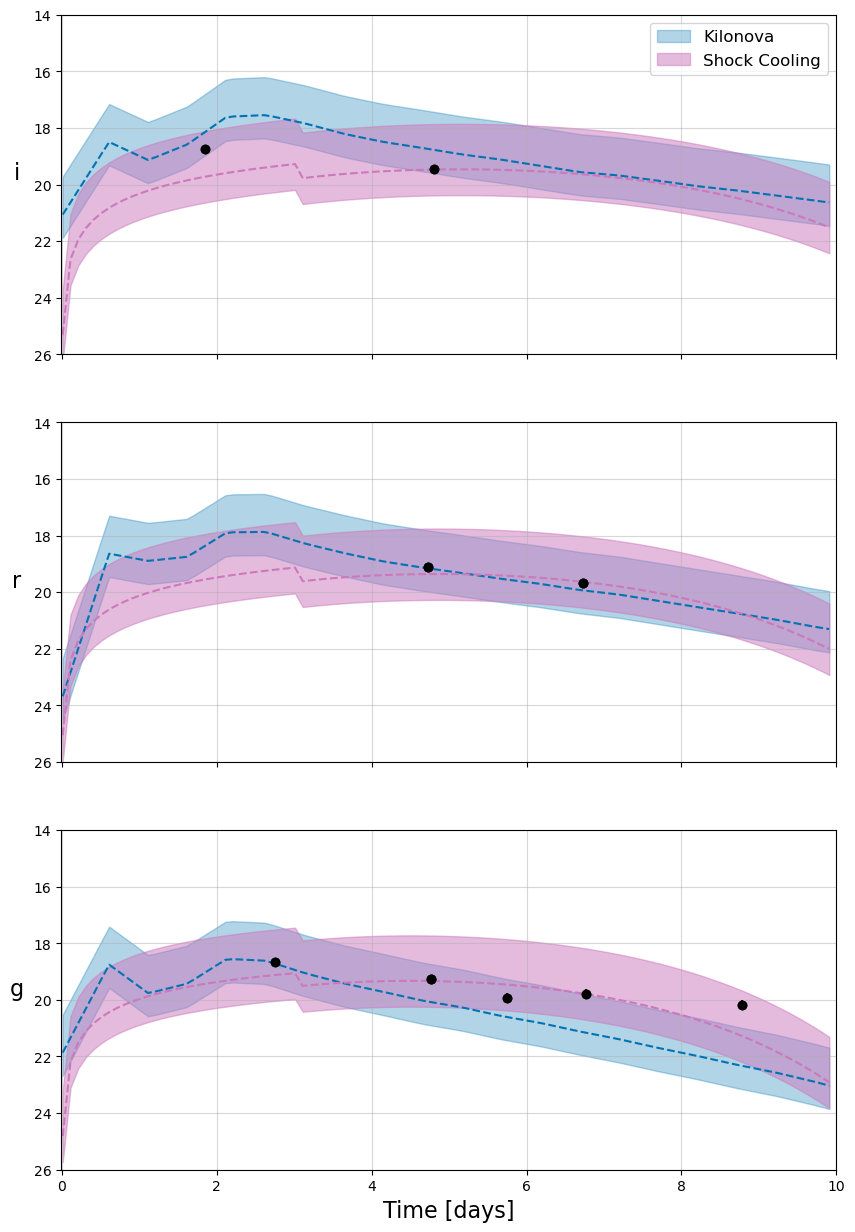

In [61]:
plt.style.use("seaborn-colorblind")
plt.style.context(("seaborn-colorblind",))
abotosePath = './candidate_data/paper_candidates/v1/candidate_data/ZTF21abotose.dat'
df2 = pd.read_csv(abotosePath, sep=' ', header=None, names=['t', 'filter', 'mag', 'mag_unc'])
df2['t'] = Time(pd.to_datetime(df2['t'])).mjd
df2['t'] = df2['t'] - Time('2021-07-28 05:10:28.004').mjd #+2.75
df2.head(25)

fig, axs = plt.subplots(3,1,figsize=(10, 15),sharex=True, sharey=True, facecolor='w')
filters = ['i', 'r', 'g']

for i, filter in enumerate(filters):
    ax = axs[i]
    ax.set_ylabel(f'{filter}',rotation=0, labelpad=12, fontsize=16)
    
    kn_lcc = luminosity(kn_bf["luminosity_distance"], kn_blc[1][filter])
    kn_lcc_lower = luminosity(kn_bf["luminosity_distance"]+kn_var*2, kn_blc[1][filter])
    kn_lcc_upper = luminosity(kn_bf["luminosity_distance"]-kn_var*2, kn_blc[1][filter])
    ax.fill_between(sample_times, kn_lcc_lower, kn_lcc_upper, color=cp[0], alpha=0.3, label='Kilonova')
    ax.plot(sample_times, kn_lcc, color=cp[0], linestyle='--', )
    
    sc_lcc = luminosity(sc_bf["luminosity_distance"], sc_blc[1][filter])
    sc_lcc_upper = luminosity(sc_bf["luminosity_distance"]+sc_var, sc_blc[1][filter])
    sc_lcc_lower = luminosity(sc_bf["luminosity_distance"]-sc_var, sc_blc[1][filter])
    ax.fill_between(sample_times, sc_lcc_lower, sc_lcc_upper, color=cp[4], alpha=0.5,label='Shock Cooling')
    ax.plot(sample_times, sc_lcc, color=cp[4], linestyle='--', )
    
    try:
        detections = df2[(df2['filter'] == filter) & (df2['mag_unc'] != np.inf)]
    except:
        detections = None
    try:
        non_detections = df2[(df2['filter'] == filter) & (df2['mag_unc'] == np.inf)]
    except:
        non_detections = None
    #non_detections = df[(df['filter'] == filter) & (df['mag_unc'] is np.inf)]
    #display(detections)
    
    try: 
        ax.errorbar(detections['t'], detections['mag'], yerr=detections['mag_unc'], fmt='o', color='k') 
    except: 
        None
    try: 
        ax.scatter(non_detections['t'], non_detections['mag'], marker='v', color='k',zorder=10) 
    except: 
        None
    ax.invert_yaxis()
    ax.set_ylim(26, 14)
    ax.set_xlim(-0.01,10)
    axs[0].legend(loc='upper right', fontsize=12)
    ax.grid(alpha=0.5)
    axs[2].set_xlabel('Time [days]', fontsize=16)

#plt.savefig('outdir/ZTF21abotoseModels.png', dpi=300, bbox_inches='tight')    
#plt.show()    